In [10]:
import os
import pandas as pd
import glob



In [19]:
DIR = os.getcwd()
DATA = r'C:\Users\marco\diabetesML\CLARITY_Export_Bryan_Ian_2019-04-09_180533.csv'

def importclarityCSV(rawData=DATA):
    csv_path = rawData
    return pd.read_csv(csv_path)

Import the data and take a look at it

In [25]:
data = importclarityCSV();
data.head()

,Index,Timestamp (YYYY-MM-DDThh:mm:ss),Event Type,Event Subtype,Patient Info,Device Info,Source Device ID,Glucose Value (mg/dL),Insulin Value (u),Carb Value (grams),Duration (hh:mm:ss),Glucose Rate of Change (mg/dL/min),Transmitter Time (Long Integer),Transmitter ID
0,1,NaN,FirstName,NaN,Ian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,LastName,NaN,Bryan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,Device,NaN,NaN,Dexcom G6 Mobile App,Android G6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,Alert,Fall,NaN,NaN,Android G6,NaN,NaN,NaN,NaN,3.0,NaN,NaN
4,5,NaN,Alert,High,NaN,NaN,Android G6,200.0,NaN,NaN,NaN,NaN,NaN,NaN


The data is not quite organized yet so we need to clean it

In [65]:
firstName = data.iloc[0]["Patient Info"]
lastName = data.iloc[1]["Patient Info"]
deviceInfo = data.iloc[2]["Device Info"]
sourceID = data.iloc[2]["Source Device ID"]
cleanData = data.iloc[11:]  

Now we have extracted the Patient name and Device Info.  Now lets re-index the data table according to times.  Later we will be able to add specific other events here as well.  For right now we are only worried about the times. 

In [144]:
from datetime import datetime
import numpy as np

times = cleanData["Timestamp (YYYY-MM-DDThh:mm:ss)"];
glucose = cleanData["Glucose Value (mg/dL)"];

t=pd.to_datetime(times, format = '%Y-%m-%dT%H:%M:%S')
df = pd.DataFrame(data={'Time':t, 'Glucose':glucose})

df = df.set_index('Time')
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Time'] = df.index.time

In [145]:
df.dtypes

Glucose    float64
Year         int64
Month        int64
Day          int64
Time        object
dtype: object

In [146]:
df.head()

,Glucose,Year,Month,Day,Time
Time,,,,,
2019-02-19 11:29:33,232.0,2019,2,19,11:29:33
2019-02-19 11:34:33,235.0,2019,2,19,11:34:33
2019-02-19 11:39:33,238.0,2019,2,19,11:39:33
2019-02-19 11:44:33,242.0,2019,2,19,11:44:33
2019-02-19 11:49:33,246.0,2019,2,19,11:49:33


As an example lets plot one days worth of blood sugar levels

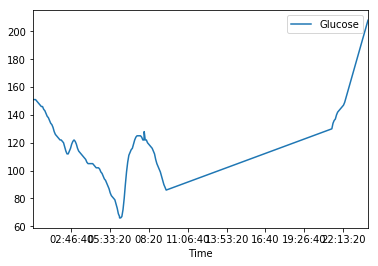

In [149]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

dataForOneDay = df.loc['2019-02-20']
dataForOneDay.plot(x="Time", y="Glucose")


In [155]:
df.max()

Glucose         333
Year           2019
Month             4
Day              31
Time       23:59:32
dtype: object

In [118]:

x = df.iloc[0:100]["Time"]
y = df.iloc[0:100]["Glucose"]

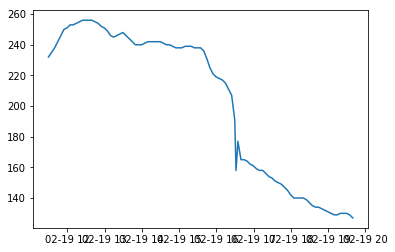

In [119]:
plt.plot(x,y)